In [ ]:
import pandas as pd
import numpy as np
import cv2


In [ ]:
cv2.imread("/content/images_142 (2).jpg")
cv2.imread("/content/images_142 (3).jpg")

In [ ]:
cv2.imread("/content/images_142 (2).jpg").shape


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
cv2.imread("/content/images_142 (3).jpg").shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
cv2.resize(cv2.imread("/content/images_142 (2).jpg"),(100,100))

In [ ]:
cv2.resize(cv2.imread("/content/images_142 (3).jpg"),(100,100))

In [ ]:
img1=cv2.cvtColor(cv2.resize(cv2.imread("/content/images_142 (2).jpg"),(100,100)),cv2.COLOR_BGR2GRAY)


In [ ]:
img2=cv2.cvtColor(cv2.resize(cv2.imread("/content/images_142 (3).jpg"),(100,100)),cv2.COLOR_BGR2GRAY)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(img1.reshape(1,-1),img2.reshape(1,-1))

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color

image = io.imread('/content/51qId39VZrL.jpg')
gray_image = color.rgb2gray(image)




In [ ]:
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)


(-0.5, 1423.5, 1423.5, -0.5)

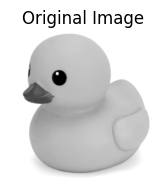

In [ ]:
k_values = [5, 20, 50, 100]
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

singular value
then the  U , Sigma , V
plot
and take the k as a value "compression control value"
then take the value of U as n*n (n*k) sigme k*k , then the V=k*n

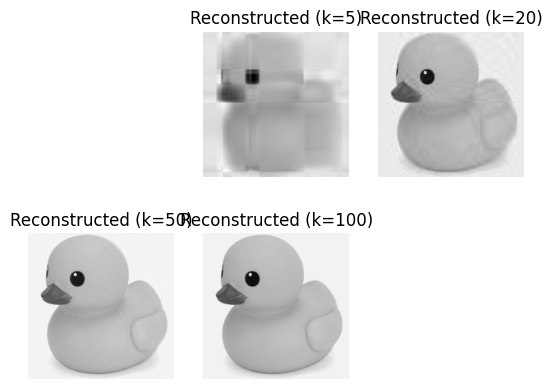

In [ ]:
for i, k in enumerate(k_values):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]

    reconstructed_image_k = np.dot(U_k, np.dot(S_k, Vt_k))

    plt.subplot(2, 3, i+2)
    plt.imshow(reconstructed_image_k, cmap='gray')
    plt.title(f'Reconstructed (k={k})')
    plt.axis('off')

plt.show()

In [ ]:
n, m = 1424, 1424

for k in k_values:
    original_size = n * m
    compressed_size = k * (n + m + 1)
    compression_ratio = compressed_size / original_size

    print(f"Compression Ratio for k={k}: {compression_ratio:.4f}")

Compression Ratio for k=5: 0.0070
Compression Ratio for k=20: 0.0281
Compression Ratio for k=50: 0.0702
Compression Ratio for k=100: 0.1405


#SVD on RGB Image

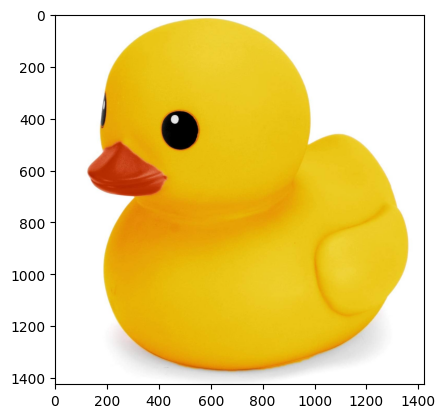

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('/content/51qId39VZrL.jpg')

show_image = plt.imshow(image)
show_image


In [ ]:
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]




(-0.5, 1423.5, 1423.5, -0.5)

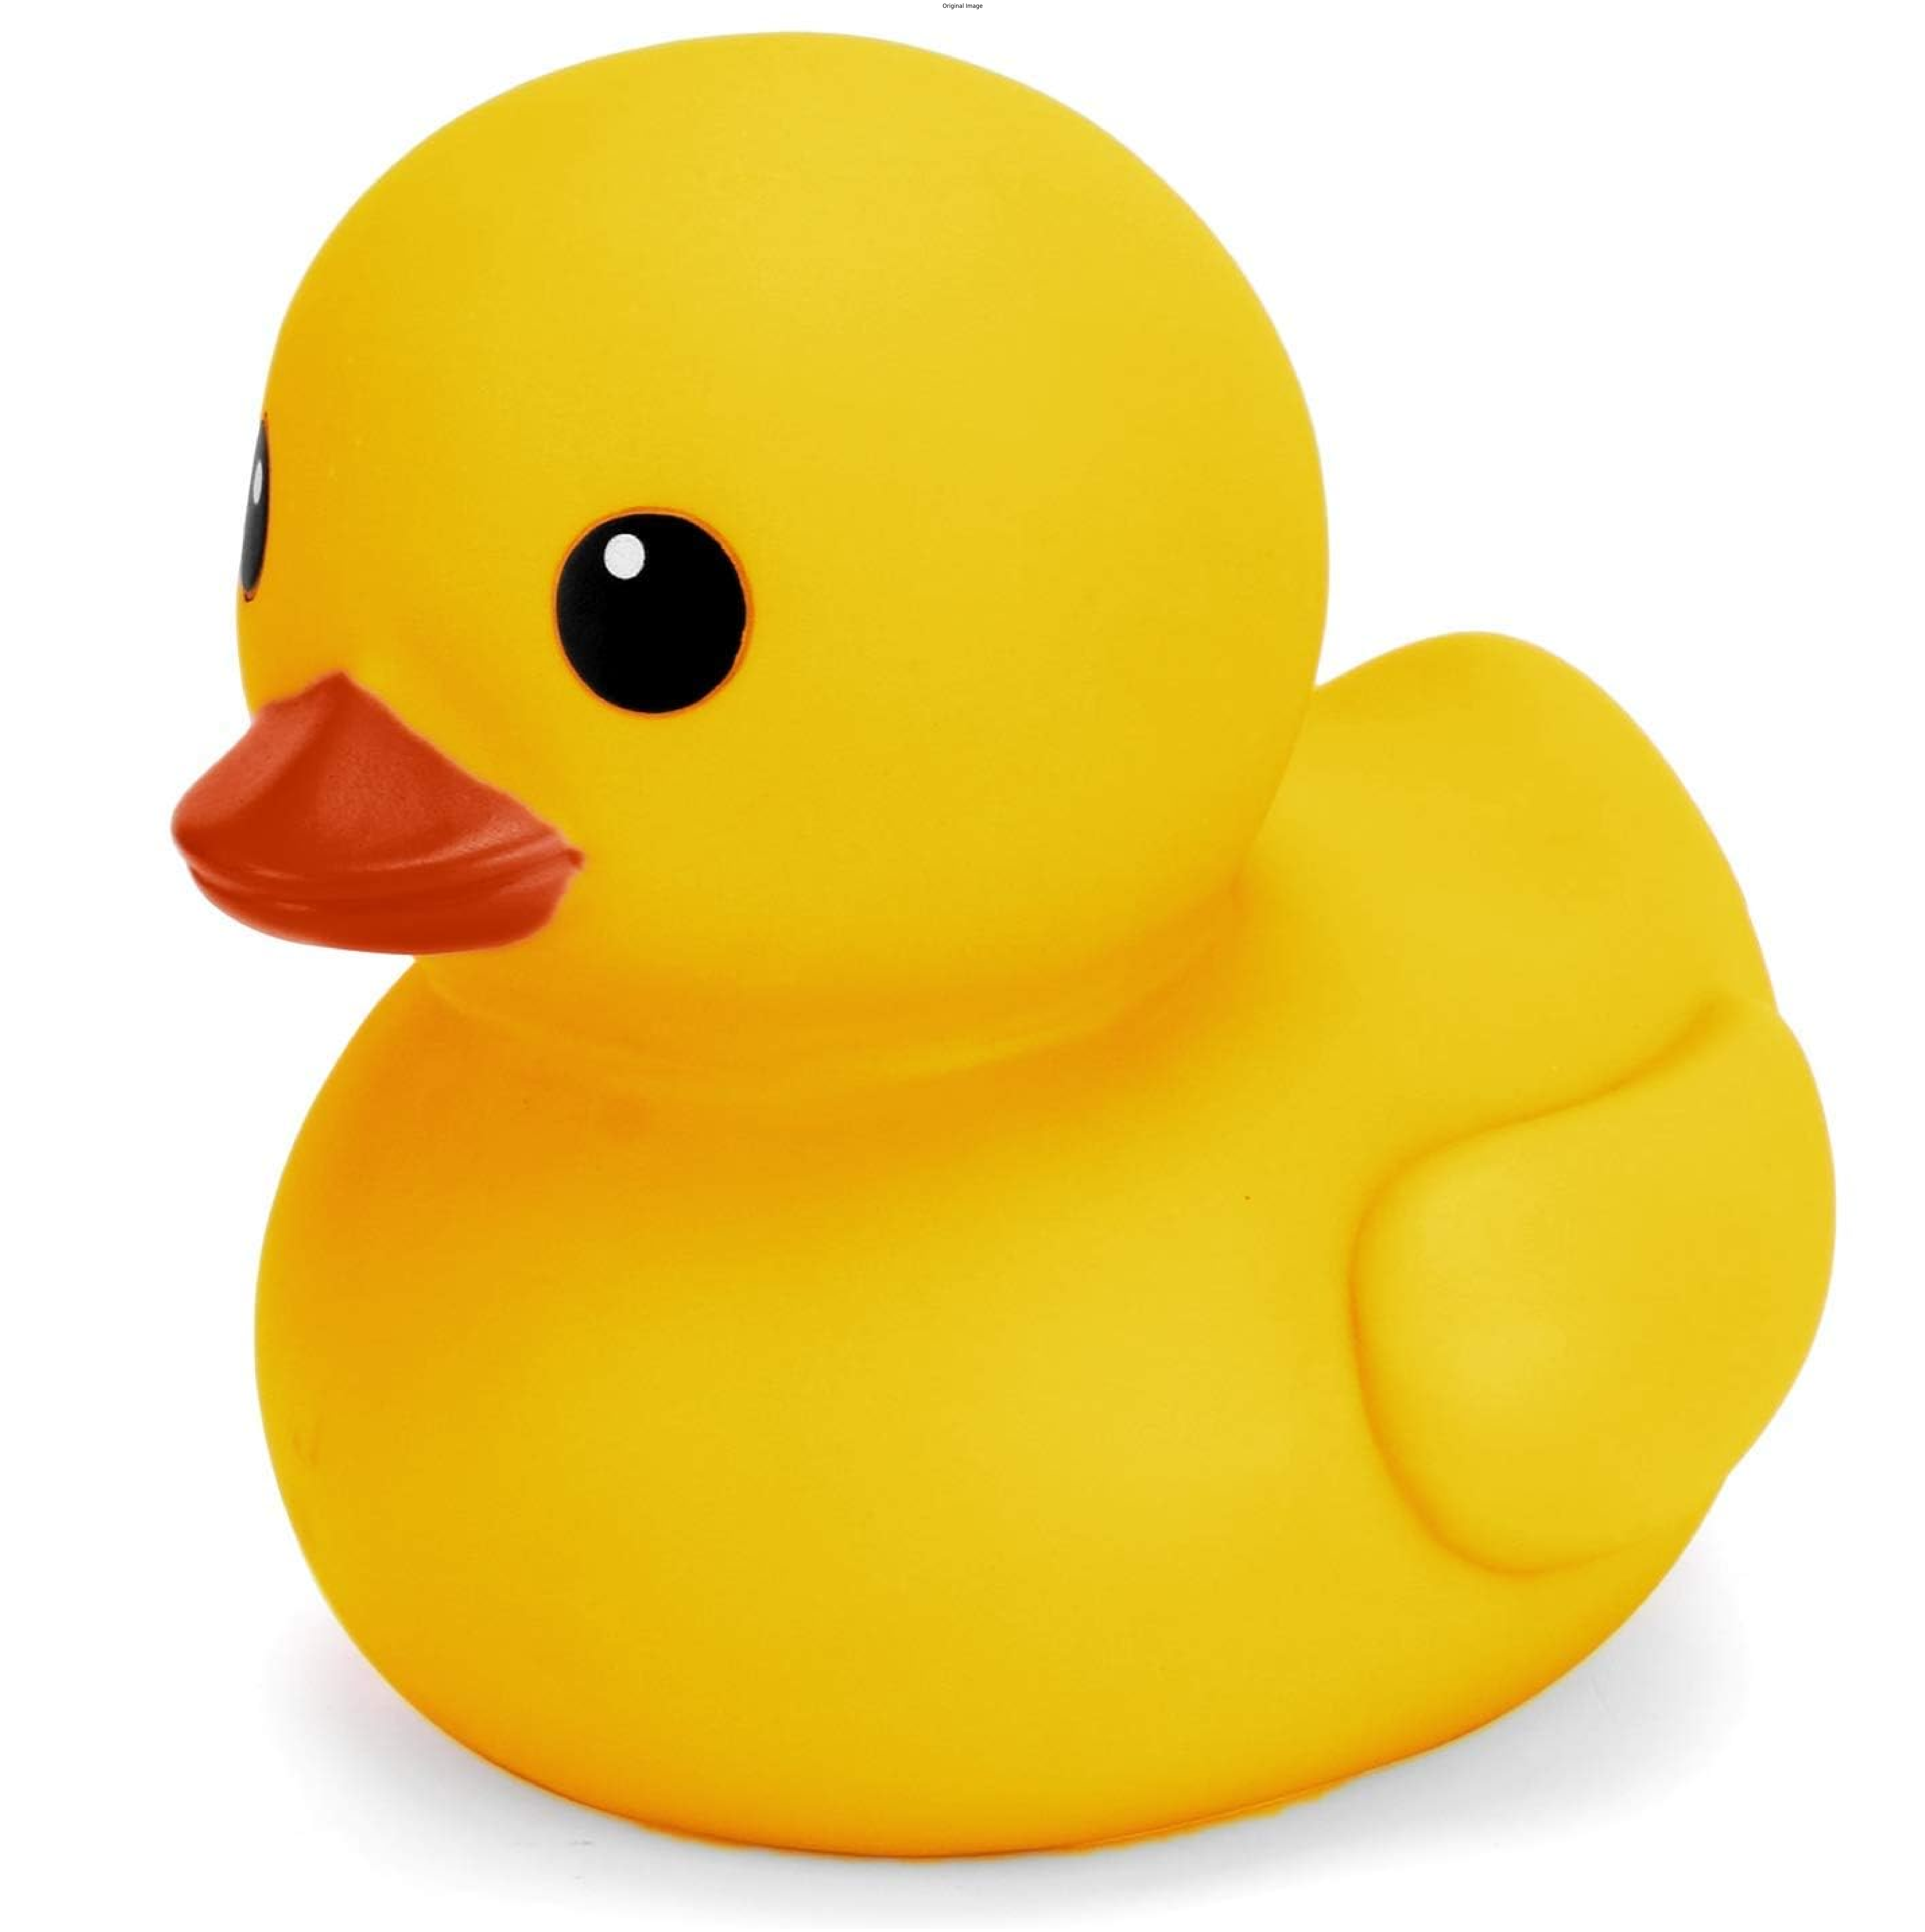

In [ ]:
def svd_reconstruct(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    reconstructed_channel = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_channel

k_values = [5, 20, 50, 100]

plt.figure(figsize=(256, 256))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')




KeyboardInterrupt: 

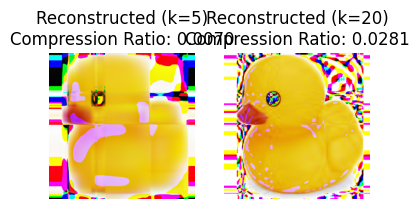

In [ ]:
compression_ratios = []

for i, k in enumerate(k_values):
    R_k = svd_reconstruct(R, k)
    G_k = svd_reconstruct(G, k)
    B_k = svd_reconstruct(B, k)

    reconstructed_image = np.stack([R_k, G_k, B_k], axis=2).astype(np.uint8)

    original_size = n * m * 3
    compressed_size = k * (n + m + 1) * 3

    compression_ratio = compressed_size / original_size
    compression_ratios.append(compression_ratio)

    plt.subplot(2, 3, i + 2)
    plt.imshow(reconstructed_image)
    plt.title(f'Reconstructed (k={k})\nCompression Ratio: {compression_ratio:.4f}')
    plt.axis('off')

plt.show()

for k, ratio in zip(k_values, compression_ratios):
    print(f"Compression Ratio for k={k}: {ratio:.4f}")

In [ ]:
for k, ratio in zip(k_values, compression_ratios):
    print(f"Compression Ratio for k={k}: {ratio:.4f}")

#Adding Gaussian Noise

In [ ]:
def add_gaussian_noise(img, mean=0, var=50):
    sigma = var ** 2
    gauss = np.random.normal(mean, sigma, img.shape).astype('float32')

    noisy_image = cv2.add(img.astype('float32'), gauss)

    noisy_image = np.clip(noisy_image, 0, 255).astype('uint8')
    return noisy_image

In [ ]:
noisy_image = add_gaussian_noise(image, mean=0, var=20)


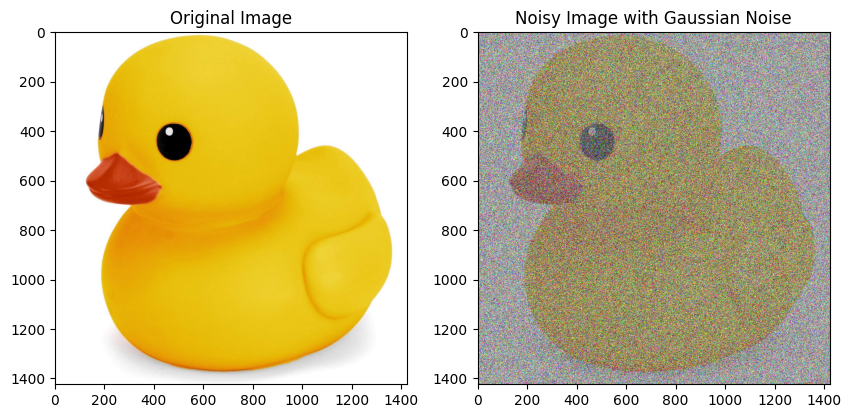

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image with Gaussian Noise")

plt.show()